Displaying WMTS tiled map data on an arbitrary projection
---------------------------------------------------------

This example displays imagery from a web map tile service on two different
projections, one of which is not provided by the service.

This result can also be interactively panned and zoomed.

The example WMTS layer is a single composite of data sampled over nine days
in April 2012 and thirteen days in October 2012 showing the Earth at night.
It does not vary over time.

The imagery was collected by the Suomi National Polar-orbiting Partnership
(Suomi NPP) weather satellite operated by the United States National Oceanic
and Atmospheric Administration (NOAA).

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:


def plot_city_lights():
    # Define resource for the NASA night-time illumination data.
    base_uri = 'http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
    layer_name = 'VIIRS_CityLights_2012'

    # Create a Cartopy crs for plain and rotated lat-lon projections.
    plain_crs = ccrs.PlateCarree()
    rotated_crs = ccrs.RotatedPole(pole_longitude=120.0, pole_latitude=45.0)

    fig = plt.figure()

    # Plot WMTS data in a specific region, over a plain lat-lon map.
    ax = fig.add_subplot(1, 2, 1, projection=plain_crs)
    ax.set_extent([-6, 3, 48, 58], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m', color='yellow')
    ax.gridlines(color='lightgrey', linestyle='-')
    # Add WMTS imaging.
    ax.add_wmts(base_uri, layer_name=layer_name)

    # Plot WMTS data on a rotated map, over the same nominal region.
    ax = fig.add_subplot(1, 2, 2, projection=rotated_crs)
    ax.set_extent([-6, 3, 48, 58], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m', color='yellow')
    ax.gridlines(color='lightgrey', linestyle='-')
    # Add WMTS imaging.
    ax.add_wmts(base_uri, layer_name=layer_name)

    plt.show()


SSLError: HTTPSConnectionPool(host='map1c.vis.earthdata.nasa.gov', port=443): Max retries exceeded with url: /wmts-geo/wmts.cgi?service=WMTS&request=GetCapabilities&version=1.0.0 (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls12_check_peer_sigalg', 'wrong signature type')])")))

/usr/lib/python3/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


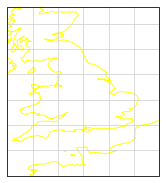

In [3]:
plot_city_lights()